![alt text](https://i.imgur.com/1WaY7aA.png)


---



---



# Lab 3.1.1 
# *Data Wrangling and Munging with Pandas*

## Part 1: Wrangling Data

The term "data wrangling" is analogous to capturing wild horses and getting them into a fenced area; the horses are data and the fencing is your computer. The more common data wrangling tasks include:

- reading flat files
- reading Excel files
- downloading from web pages
  - csv
  - html
  - json

In [1]:
import numpy as np
import pandas as pd

*It is good practice to display the library version numbers for future reference:*

In [2]:
print('Numpy: ', np.__version__)
print('Pandas: ', pd.__version__)

Numpy:  1.15.4
Pandas:  0.23.4


### CSV Files

Below are three attempts to load the file "bikeshare.csv" into a DataFrame named `bikes`. Why are they wrong?

In [3]:
# wrong:
bikes = pd.read_table('DATA3/bikeshare.csv', header = None)
print(bikes.head())
print()

# wrong:
bikes = pd.read_table('DATA3/bikeshare.csv', header = 1)
print(bikes.head())
print()

# wrong:
bikes = pd.read_table('DATA3/bikeshare.csv', header = 0)
print(bikes.head())

                                                   0
0  instant,dteday,season,yr,mnth,hr,holiday,weekd...
1  1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,...
2  2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.8,0...
3  3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.8,0...
4  4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,...

  1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0,3,13,16
0  2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.8,0...     
1  3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.8,0...     
2  4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,...     
3  5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,...     
4  6,2011-01-01,1,0,1,5,0,6,0,2,0.24,0.2576,0.75,...     

  instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0  1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,...                                                                   
1  2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.8,0...                                        

?:
ANSWER: Case 1 treats headings as just another data row. Case 2 treats the 1st data row as the column header. Case 3 gets the header right (row 0), but reads each row as a single column (Nb. the other two make that same mistake). 

Load the file "bikeshare.csv" into a DataFrame named `bikes`, and confirm that it was loaded properly:

In [4]:
#ANSWER:
bikes = pd.read_csv('DATA3/bikeshare.csv', header = 0, sep = ',')
print(bikes.head())

   instant      dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1   0        0        6           0   
1        2  2011-01-01       1   0     1   1        0        6           0   
2        3  2011-01-01       1   0     1   2        0        6           0   
3        4  2011-01-01       1   0     1   3        0        6           0   
4        5  2011-01-01       1   0     1   4        0        6           0   

   weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  
0           1  0.24  0.2879  0.81        0.0       3          13   16  
1           1  0.22  0.2727  0.80        0.0       8          32   40  
2           1  0.22  0.2727  0.80        0.0       5          27   32  
3           1  0.24  0.2879  0.75        0.0       3          10   13  
4           1  0.24  0.2879  0.75        0.0       0           1    1  


Note that we could have used `read.csv()` above. When is `read_table()` necessary?

?:
ANSWER: When `sep` is not the comma character, or we need fine control that `read.csv()` does not provide.

Flat files can be full of surprises. Here are some issues to watch out for:

- separator character is something other than the comma
  - ";", "|", and tab are popular
- newline character is something other than what the O/S expects 
  - Tip: Don't hard-code the character codes for carriage returns, linefeeds, etc. Use Python's built-in representation instead (e.g. Python translates "\n" to the newline character and "\t" to the tab character on any O/S).
- truncated lines
  - if there are empty fields at the end of a line it is possible that their separators will be missing, resulting in a "jagged" file
- embedded commas or quotes
  - a free-text field containing embedded commas may split into separate fields on input
  - a free-text field containing embedded quotes may not parse correctly
- unescaped characters
  - the "\" character indicates a control code to Python, which will break the I/O
    - e.g. the substring "\u0123" will be interpreted as Unicode(0123) -- which may not be what the file creator intended
  - these may need to be fixed by loading whole strings and then parsing into a new data frame
  
Tip: Most issues can be delth with by correctly specifying the parameters of the function you use to load the file. Read the doco before reading the data!

### Reading Excel Files

In [5]:
from pandas import ExcelFile  # Nb. Need to install xlrd from conda (it does not automatically install with pandas)

In [6]:
df = pd.read_excel('DATA3/Iris.xls', sheet_name = 'Data', header = 0)
df.tail()

,Species_No,Petal_width,Petal_length,Sepal_width,Sepal_length,Species_name
145,3,2.3,5.2,3.0,6.7,Verginica
146,3,1.9,5.0,2.5,6.3,Verginica
147,3,2.0,5.2,3.0,6.5,Verginica
148,3,2.3,5.4,3.4,6.2,Verginica
149,3,1.8,5.1,3.0,5.9,Verginica


So, this file appears to have an embedded table of aggregates on the same sheet as the raw data (a naughty but common practice amongst analysts).

It is usually better to load data correctly than to meddle with the source file or load it 'warts and all' and then try to parse it in code. The Pandas functions for reading files have parameters that provide the control we need. For ecxample, we could make multiple calls to `read_excel()`, using combinations of the `header`, `usecols`, `skiprows`, `nrows`, and `skipfooter` parameters to load one table at a time from a spreadsheet with multiple tables.

Load the above file without the unwanted columns:

In [7]:
#ANSWER
df = pd.read_excel('DATA3/Iris.xls', sheet_name = 'Data', header = 0, usecols=[1,2,4,5])
df.sample(2)
#wanted to see if the usecols work, hence did not include columns 0,3

,Petal_width,Petal_length,Sepal_length,Species_name
53,1.3,4.0,5.5,Versicolor
44,0.4,1.9,5.1,Setosa


### Importing Data Directly from the Web

We usually want to store a local copy of a data file that we download from the Web, but when data retention is not a priority it is convenient to download the data directly into our running Python environment.

#### Importing Text Files from the Web

The web is the 'wild west' of data formats. However, we can usually expect good behaviour from files that are automatically generated by a service, such as the earthquake report:

In [8]:
df = pd.read_csv('https://earthquake.usgs.gov/earthquakes/feed/v1.0/summary/2.5_hour.csv')
df.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2019-07-19T07:51:22.300Z,37.451000,-118.879669,3.12,2.80,md,27.0,133.0,0.14450,0.05,...,2019-07-19T07:56:04.048Z,"22km SW of Toms Place, CA",earthquake,0.29,1.83,0.210,33.0,automatic,nc,nc
1,2019-07-19T07:48:49.030Z,35.929000,-117.683833,2.44,2.51,ml,31.0,72.0,0.06699,0.15,...,2019-07-19T07:52:38.588Z,"20km E of Little Lake, CA",earthquake,0.18,0.35,0.098,25.0,automatic,ci,ci
2,2019-07-19T07:03:19.583Z,60.188000,-153.222400,136.10,2.50,ml,NaN,NaN,NaN,0.59,...,2019-07-19T07:13:52.054Z,"42km SW of Redoubt Volcano, Alaska",earthquake,NaN,0.70,NaN,NaN,automatic,ak,ak
3,2019-07-19T06:58:36.180Z,36.119333,-117.824167,2.17,2.49,ml,26.0,58.0,0.02491,0.18,...,2019-07-19T07:02:26.260Z,"14km NE of Coso Junction, CA",earthquake,0.26,0.45,0.185,26.0,automatic,ci,ci


#### Importing HTML Files from the Web

Working with unstructured HTML files relies heavily on library functions. This one, however, is well-structured:

In [9]:
url = 'http://www.fdic.gov/bank/individual/failed/banklist.html'
df = pd.read_html(url)
df

[                                             Bank Name                City  \
 0                                 The Enloe State Bank              Cooper   
 1                  Washington Federal Bank for Savings             Chicago   
 2      The Farmers and Merchants State Bank of Argonia             Argonia   
 3                                  Fayette County Bank          Saint Elmo   
 4    Guaranty Bank, (d/b/a BestBank in Georgia & Mi...           Milwaukee   
 5                                       First NBC Bank         New Orleans   
 6                                        Proficio Bank  Cottonwood Heights   
 7                        Seaway Bank and Trust Company             Chicago   
 8                               Harvest Community Bank          Pennsville   
 9                                          Allied Bank            Mulberry   
 10                        The Woodbury Banking Company            Woodbury   
 11                              First CornerStone B

#### Importing XML Files from the Web

XML files are semi-structured, but you're at the mercy of the file creator. If every record has the same format it will be much easier, but practical applications often require a lot of custom code. Here is an example that includes a nice parser class: http://www.austintaylor.io/lxml/python/pandas/xml/dataframe/2016/07/08/convert-xml-to-pandas-dataframe/

#### Importing JSON Files from the Web

Like XML, JSON files are semi-structured and may require work to capture the schema into a dataframe. Here is a simple example: 

In [10]:
url = 'https://raw.githubusercontent.com/chrisalbon/simulated_datasets/master/data.json'

# Load the first sheet of the JSON file into a data frame
df = pd.read_json(url, orient = 'columns')
df.head()

,integer,datetime,category
0,5,2015-01-01 00:00:00,0
1,5,2015-01-01 00:00:01,0
10,5,2015-01-01 00:00:10,0
11,5,2015-01-01 00:00:11,0
12,8,2015-01-01 00:00:12,0


## Part 2: Data Munging

Data munging is manipulating data to get it into a form that we can start running analyses on (which usually means getting the data into a DataFrame). Before we get to this stage, we may need to remove headers or footers, transpose columns to rows, split wide data tables into long ones, and so on. (Nb. Excel files can be particularly troublesome, because users can format their data in mixed, complex shapes.) Essentially, we need to follow Hadley Wickham's guidelines for tidy datasets (http://vita.had.co.nz/papers/tidy-data.html):

The end goal of the cleaning data process:

- each variable should be in one column
- each observation should comprise one row
- each type of observational unit should form one table
- include key columns for linking multiple tables
- the top row contains (sensible) variable names
- in general, save data as one file per table


### Dataset Morphology

Once we have our dataset in a DataFrame (or Series, if our data is only 1-dimensional), we can start examining its size and content.

How many rows and columns are in `bikes`?

In [11]:
#ANSWER
bikes.shape

(17379, 17)

What are the column names in `bikes`?

In [12]:
#ANSWER
bikes.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

What are the data types of these columns?

In [13]:
#ANSWER
bikes.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
hr              int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

What is the (row) index for this DataFrame?

In [14]:
#ANSWER
bikes.index

RangeIndex(start=0, stop=17379, step=1)

https://www.dataquest.io/blog/python-json-tutorial/

## Slicing and Dicing

It is often preferable to refer to DataFrame columns by name, but there is more than one way to do this. 
Do `bikes['season']` and `bikes[['season']]` give the same object? Demonstrate:

In [15]:
#ANSWER revise.
print(bikes['season'][10])
# print(bikes['season']) here it prints out all

1


How would we use object notation to show the first 4 rows of `atemp`?

In [16]:
#ANSWER
print(bikes['atemp'].head(4))


0    0.2879
1    0.2727
2    0.2727
3    0.2879
Name: atemp, dtype: float64


Algorithms that loop over multiple columns often access DataFrame columns by index. However, none of the following work (try them out by uncommenting / removing the "#E: " ): 

In [17]:
# bikes[[0:1]]
# df = bikes[1]
# print(df)
# bikes[0,0]
# bikes[[0,0]]

# Object Type	Indexers
# Series	s.loc[indexer]
# DataFrame	df.loc[row_indexer,column_indexer]
# Panel	p.loc[item_indexer,major_indexer,minor_indexer]
# In [6]: s = df['A']

# In [7]: s[dates[5]]
# Out[7]: -0.67368970808837059

# In [8]: panel['two']

What is the correct way to access the 1st row of the DataFrame by its index?

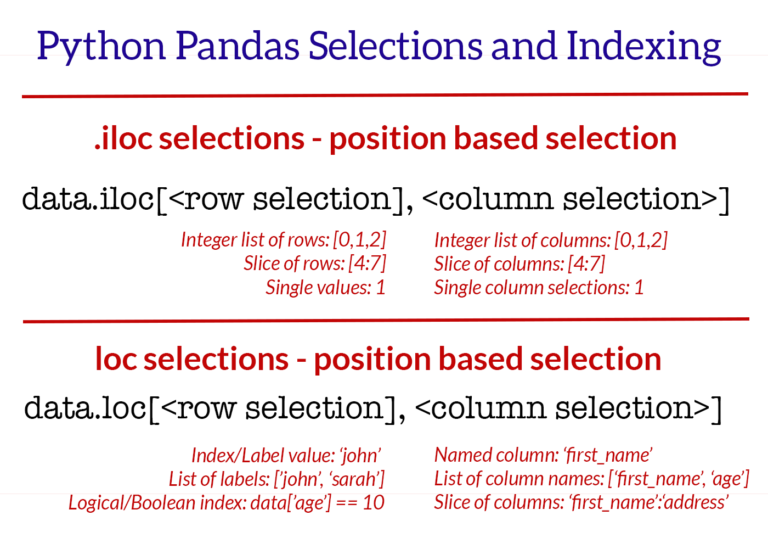

In [18]:
#ANSWER
bikes.loc[1]

instant                2
dteday        2011-01-01
season                 1
yr                     0
mnth                   1
hr                     1
holiday                0
weekday                6
workingday             0
weathersit             1
temp                0.22
atemp             0.2727
hum                  0.8
windspeed              0
casual                 8
registered            32
cnt                   40
Name: 1, dtype: object

What is the correct way to access the 2nd column of the DataFrame by its index?

In [19]:
#ANSWER
bikes.iloc[:,1] 
# bikes.iloc[:,0:2]

# data.iloc[0] # first row of data frame (Aleshia Tomkiewicz) - Note a Series data type output.
# data.iloc[1] # second row of data frame (Evan Zigomalas)
# data.iloc[-1] # last row of data frame (Mi Richan)
# # Columns:
# data.iloc[:,0] # first column of data frame (first_name)
# data.iloc[:,1] # second column of data frame (last_name)
# data.iloc[:,-1] # last column of data frame (id)

# # Multiple row and column selections using iloc and DataFrame
# data.iloc[0:5] # first five rows of dataframe
# data.iloc[:, 0:2] # first two columns of data frame with all rows
# data.iloc[[0,3,6,24], [0,5,6]] # 1st, 4th, 7th, 25th row + 1st 6th 7th columns.
# data.iloc[0:5, 5:8] # first 5 rows and 5th, 6th, 7th columns of data frame (county -> phone1).


0        2011-01-01
1        2011-01-01
2        2011-01-01
3        2011-01-01
4        2011-01-01
5        2011-01-01
6        2011-01-01
7        2011-01-01
8        2011-01-01
9        2011-01-01
10       2011-01-01
11       2011-01-01
12       2011-01-01
13       2011-01-01
14       2011-01-01
15       2011-01-01
16       2011-01-01
17       2011-01-01
18       2011-01-01
19       2011-01-01
20       2011-01-01
21       2011-01-01
22       2011-01-01
23       2011-01-01
24       2011-01-02
25       2011-01-02
26       2011-01-02
27       2011-01-02
28       2011-01-02
29       2011-01-02
            ...    
17349    2012-12-30
17350    2012-12-30
17351    2012-12-30
17352    2012-12-30
17353    2012-12-30
17354    2012-12-30
17355    2012-12-31
17356    2012-12-31
17357    2012-12-31
17358    2012-12-31
17359    2012-12-31
17360    2012-12-31
17361    2012-12-31
17362    2012-12-31
17363    2012-12-31
17364    2012-12-31
17365    2012-12-31
17366    2012-12-31
17367    2012-12-31


## Handling Missing Values

What is the Pandas `isnull` function for? 

?
ANSWER:

We can apply `isnull` to the `bikes` DataFrame to show the result for every element:

In [20]:
bikes.isnull().head(2)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


However, we usually start at a higher level. How many nulls are in `bikes` altogether?

In [21]:
#ANSWER
bikes['atemp'].isnull().sum()

0

If this result were nonzero we would next want to find out which columns contained nulls. How can this be done in one line of code?

In [22]:
#ANSWER
bikes.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

What is the Numpy object `nan` used for? (Write a descriptive answer.)

?
ANSWER: Marking a data point as invalid.

Write (and verify) a function that performs scalar division with built-in handling of the edge case (i.e. return a value instead of just trapping the error):

In [23]:
#ANSWER continue
def divide(dividend,divisor):
    if divisor == 0:
        quotient = np.nan
    else:
        quotient = dividend / divisor
    return (quotient)
print(divide(1,0))


nan


Apply the Pandas `isna` function to the following data objects:

In [24]:
x = 2.3
y = np.nan
print(x, y)

2.3 nan


In [25]:
#ANSWER
print(pd.isna(x),pd.isna(y))

False True


In [26]:
array = np.array([[1, np.nan, 3], [4, 5, np.nan]])
print(array)

[[ 1. nan  3.]
 [ 4.  5. nan]]


In [27]:
#ANSWER
print(pd.isna(array))

[[False  True False]
 [False False  True]]


How is the pandas I/O parameter `na_values` used?

? ANSWER: ####Revise

In [28]:
#print(pd.na_values(array))
#  For converting specially coded strings to NaN on input (e.g. "###", "N/A", "NULL").
print(pd.DataFrame(array))

     0    1    2
0  1.0  NaN  3.0
1  4.0  5.0  NaN


In [29]:
#revise
df = pd.DataFrame({'eps': ['1', 1.6, '1.6', 'a', '', 'a1']})

# df['eps'] = pd.to_numeric(df['eps'], errors='coerce')
print(pd.to_numeric(df['eps'], errors='coerce'))
# 'coerce' will convert any value error to NaN

0    1.0
1    1.6
2    1.6
3    NaN
4    NaN
5    NaN
Name: eps, dtype: float64


## Data Profiling

### Counts

When there are categorical variables in a dataset we will want to know how many possible values there are in each column. (Nb. If the dataset is a sample of a larger one, our sample may not capture all possible values of every categorical.)

How many (different) seasons are in `bikes`?

In [30]:
#ANSWER
bikes['season'].value_counts
#bikes.columns
# bikes.groupby('season').nunique()

#df = df.groupby('domain')['ID'].nunique()

<bound method IndexOpsMixin.value_counts of 0        1
1        1
2        1
3        1
4        1
5        1
6        1
7        1
8        1
9        1
10       1
11       1
12       1
13       1
14       1
15       1
16       1
17       1
18       1
19       1
20       1
21       1
22       1
23       1
24       1
25       1
26       1
27       1
28       1
29       1
        ..
17349    1
17350    1
17351    1
17352    1
17353    1
17354    1
17355    1
17356    1
17357    1
17358    1
17359    1
17360    1
17361    1
17362    1
17363    1
17364    1
17365    1
17366    1
17367    1
17368    1
17369    1
17370    1
17371    1
17372    1
17373    1
17374    1
17375    1
17376    1
17377    1
17378    1
Name: season, Length: 17379, dtype: int64>

### Ranges

Print the range of the `instant`, `dteday`, and `windspeed` columns: 

In [31]:
#ANSWER
# df.min()
print(f" Range for instant is : {bikes['instant'].min()} to {bikes['instant'].max()}" )
print(f" Range for dteday is : {bikes['dteday'].min()} to {bikes['dteday'].max()}" )
print(f" Range for windspeed is : {bikes['windspeed'].min()} to {bikes['windspeed'].max()}")

 Range for instant is : 1 to 17379
 Range for dteday is : 2011-01-01 to 2012-12-31
 Range for windspeed is : 0.0 to 0.8507


Compute and print the overall minimum and maximum of the numeric data columns:

In [32]:
# bikes_min, bikes_max = (min(bikes.min()), max(bikes.max()))
# bikes_min, bikes_max
# bikes_min, bikes_max = (min(bikes.min()), max(bikes.max()))
# bikes_min = min(bikes.min())
# bikes_max = max(bikes.max())
# code not working

### Quantiles

Pandas makes computing quantiles easy. This is how to get the median of a Series:

In [33]:
bikes['atemp'].quantile(0.5)

0.4848

Of course, the `quantiles` method can take a tuple as its argument. Compute the 10th, 25th, 50th, 75th, and 90th percentiles in one line of code: 

In [34]:
#ANSWER
bikes['atemp'].quantile((0.10,0.25,0.50, 0.75, 0.90))

0.10    0.2424
0.25    0.3333
0.50    0.4848
0.75    0.6212
0.90    0.6970
Name: atemp, dtype: float64

### Cuts

Sometimes we want to split the sample not by the quantiles of the distribution but by the range of the data. Let's take a closer look at `atemp`:

In [35]:
type(bikes['atemp'])

pandas.core.series.Series

In [36]:
bikes.sample(5)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
14276,14277,2012-08-23,3,1,8,1,0,4,1,1,0.62,0.5758,0.83,0.0000,10,15,25
13579,13580,2012-07-25,3,1,7,0,0,3,1,1,0.72,0.6667,0.58,0.2985,9,57,66
3853,3854,2011-06-14,2,0,6,11,0,2,1,1,0.64,0.6212,0.41,0.2836,40,103,143
12595,12596,2012-06-14,2,1,6,0,0,4,1,1,0.60,0.6212,0.53,0.2985,3,45,48
1486,1487,2011-03-07,1,0,3,7,0,1,1,1,0.20,0.1667,0.75,0.4179,3,88,91


Suppose we decide to sort these values into 4 bins of equal width, but we want to apply the resulting groups to the entire DataFrame. Basically, we need to add a row label that indcates which bin each sample belongs in. Let's call this label "atemp_level", and use the `cut` method to populate it:

In [37]:
atemp_level = pd.cut(bikes['atemp'], bins = 4)     
# print(atemp_level)

What is `atemp_level`?

In [38]:
#ANSWER
# classification for 'atemp'into one of the four bins

print(type(atemp_level))

<class 'pandas.core.series.Series'>


Here is a random sample of `atemp_level`:

In [39]:
atemp_level.sample(5)          

2490        (0.5, 0.75]
17167    (-0.001, 0.25]
9720        (0.25, 0.5]
12076       (0.5, 0.75]
10509       (0.25, 0.5]
Name: atemp, dtype: category
Categories (4, interval[float64]): [(-0.001, 0.25] < (0.25, 0.5] < (0.5, 0.75] < (0.75, 1.0]]

So, by default, `cut` produces labels that indicate the bin boundaries for each element in the series it was applied to. Usually, we will specify labels that are appropriate to the discretisation we are applying:

In [40]:
atemp_level = pd.cut(bikes['atemp'], bins = 4, labels = ["cool", "mild", "warm", "hot"])
atemp_level.sample(5)          

13171     hot
3819     warm
16659    mild
6654     warm
12349    warm
Name: atemp, dtype: category
Categories (4, object): [cool < mild < warm < hot]

Incorporate the new `atemp_level` column into the `bikes` DataFrame and use it to count the number of "mild" `atemp` entries in `season` 2:

In [41]:
#ANSWER
# atemp_level = pd.cut(bikes['atemp'], bins = 4)        
# bikes['atemp_level'] = atemp_level
# atemp_level = pd.cut(bikes['atemp'],bins = 4 )
# bikes.columns
# print(bikes['atemp_level']=='mild' and bikes['season']==2)
# print(bikes[(bikes.atemp_level=='mild')&(bikes.season==2)].season.count())
bikes.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


*Nb. The `atemp_level` variable we created is what the R language calls a "factor". Pandas has introduced a new data type called "category" that is similar to R's factors.*

# Synthetic Data

Sometimes we may want to generate test data, or we may need to initalise a series, matrix, or data frame for input to an algorithm. Numpy has several methods we can use for this.

Execute the following, then check the shape and content of each variable:

In [42]:
# Creating arrays with initial values
a = np.zeros((3))
b = np.ones((1,3))
c = np.random.randint(1,10,(2,3,4))   # randint(low, high, size)
d = np.arange(4)
e = np.array( [[1,2,3,4], [5,6,7,8]] )

# Cleaning Data

## Load Data

Load rock.csv and clean the dataset.

In [43]:
rk = pd.read_csv('DATA3/rock.csv', header =0, sep = ',')
print(rk.head())

               Song Clean ARTIST CLEAN Release Year  \
0        Caught Up in You  .38 Special         1982   
1            Fantasy Girl  .38 Special          NaN   
2         Hold On Loosely  .38 Special         1981   
3  Rockin' Into the Night  .38 Special         1980   
4       Art For Arts Sake         10cc         1975   

                                COMBINED  First?  Year?  PlayCount  F*G  
0        Caught Up in You by .38 Special       1      1         82   82  
1            Fantasy Girl by .38 Special       1      0          3    0  
2         Hold On Loosely by .38 Special       1      1         85   85  
3  Rockin' Into the Night by .38 Special       1      1         18   18  
4              Art For Arts Sake by 10cc       1      1          1    1  


## Check Column Names

Check column names and clean.

In [44]:
print(rk.columns)

def clean_column_name(columns_names):
    clean_column_names = []
    for i in columns_names:
        i = i.lower().replace(' ', '_')
        i = i.lower().replace('*', '')
        i = i.lower().replace('?', '')
        clean_column_names.append(i)
    return clean_column_names

Index(['Song Clean', 'ARTIST CLEAN', 'Release Year', 'COMBINED', 'First?',
       'Year?', 'PlayCount', 'F*G'],
      dtype='object')


In [45]:
rk.columns = clean_column_name(rk.columns)
print(rk.columns)

Index(['song_clean', 'artist_clean', 'release_year', 'combined', 'first',
       'year', 'playcount', 'fg'],
      dtype='object')


# Replace Null Values With 0

Check 'release' column whether this column have any null value or not. Replace null value with 0.

In [46]:
rk.isnull().sum()

song_clean        0
artist_clean      0
release_year    577
combined          0
first             0
year              0
playcount         0
fg                0
dtype: int64

# Check Datatypes of Dataset

Check datatypes of the dataset. Is there any column which should be int instead of object? Fix the column. 

In [47]:
rk.dtypes

song_clean      object
artist_clean    object
release_year    object
combined        object
first            int64
year             int64
playcount        int64
fg               int64
dtype: object

In [48]:
rk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2230 entries, 0 to 2229
Data columns (total 8 columns):
song_clean      2230 non-null object
artist_clean    2230 non-null object
release_year    1653 non-null object
combined        2230 non-null object
first           2230 non-null int64
year            2230 non-null int64
playcount       2230 non-null int64
fg              2230 non-null int64
dtypes: int64(4), object(4)
memory usage: 139.5+ KB


# Check Min, Max of Each Column

Is there any illogical value in any column? How can we fix that?

In [49]:
rk["release_year"].value_counts()

1973             104
1975              83
1977              83
1970              81
1971              75
1969              72
1980              70
1978              64
1979              63
1967              61
1981              61
1983              60
1976              56
1982              54
1984              51
1972              50
1974              48
1968              46
1985              39
1987              39
1986              37
1991              34
1989              32
1966              30
1988              29
1965              28
1994              25
1990              22
1993              19
1992              14
1964              14
1999              13
1995              10
1963               9
1997               9
1996               9
1998               6
2002               6
2012               5
2004               5
2005               5
2001               4
2003               3
2008               3
1962               3
2007               3
2000               3
2011         

In [50]:
songfacts_mask = rk['release_year'] =='SONGFACTS.COM'
rk.loc[songfacts_mask,'release_year'] = np.nan

In [51]:
rk['release_year'] = pd.to_numeric(rk['release_year'])

In [52]:
rk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2230 entries, 0 to 2229
Data columns (total 8 columns):
song_clean      2230 non-null object
artist_clean    2230 non-null object
release_year    1652 non-null float64
combined        2230 non-null object
first           2230 non-null int64
year            2230 non-null int64
playcount       2230 non-null int64
fg              2230 non-null int64
dtypes: float64(1), int64(4), object(3)
memory usage: 139.5+ KB


In [53]:
def min_max(df):
    print(df.describe().T[['min','max']])# min and max must be in "''"

In [54]:
min_max(rk)

                 min     max
release_year  1071.0  2014.0
first            1.0     1.0
year             0.0     1.0
playcount        0.0   142.0
fg               0.0   142.0


# Write Some Functions

## Write a function that will take a row of a DataFrame and print out the song, artist, and whether or not the release date is < 1970

In [58]:
rk.dtypes

song_clean       object
artist_clean     object
release_year    float64
combined         object
first             int64
year              int64
playcount         int64
fg                int64
dtype: object

In [73]:
def check_song(row):
    print('Song :' ,row['song_clean'])
    print('Artist : ', row['artist_clean'])
    print('Released year: ', row['release_year']>2000)
    print('\n')
    

In [74]:
over_90 = rk.iloc[0:10]
print(check_song(over_90))


Song : 0          Caught Up in You
1              Fantasy Girl
2           Hold On Loosely
3    Rockin' Into the Night
4         Art For Arts Sake
5                Kryptonite
6                     Loser
7             When I'm Gone
8                What's Up?
9                Take On Me
Name: song_clean, dtype: object
Artist :  0      .38 Special
1      .38 Special
2      .38 Special
3      .38 Special
4             10cc
5     3 Doors Down
6     3 Doors Down
7     3 Doors Down
8    4 Non Blondes
9             a-ha
Name: artist_clean, dtype: object
Released year:  0    False
1    False
2    False
3    False
4    False
5    False
6    False
7     True
8    False
9    False
Name: release_year, dtype: bool


None


## Write a function that converts cells in a DataFrame to float and otherwise replaces them with np.nan

In [81]:
def convert_to_float(column):
    column = pd.to_numeric(column, errors='coerce')
    return column

In [77]:
convert_to_float(rk['release_year'])
# rk['release_year'].dtypes

dtype('float64')

## Apply these functions to your dataset

In [79]:
rk.apply(convert_to_float)
rk.head(2)

,song_clean,artist_clean,release_year,combined,first,year,playcount,fg
0,Caught Up in You,.38 Special,1982.0,Caught Up in You by .38 Special,1,1,82,82
1,Fantasy Girl,.38 Special,NaN,Fantasy Girl by .38 Special,1,0,3,0


In [82]:
rk.dtypes

song_clean       object
artist_clean     object
release_year    float64
combined         object
first             int64
year              int64
playcount         int64
fg                int64
dtype: object

## Describe the new float-only DataFrame.

In [83]:
rk.describe().T # Describe Dataframe. All columns are float.

,count,mean,std,min,25%,50%,75%,max
release_year,1652.0,1978.019976,24.191247,1071.0,1971.0,1977.0,1984.0,2014.0
first,2230.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0
year,2230.0,0.741256,0.438043,0.0,0.0,1.0,1.0,1.0
playcount,2230.0,16.872646,25.302972,0.0,1.0,4.0,21.0,142.0
fg,2230.0,15.048430,25.288366,0.0,0.0,3.0,18.0,142.0


In [88]:
# rk.describe()
rk.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
song_clean,2230,2158,Changes,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
artist_clean,2230,475,The Beatles,100,NaN,NaN,NaN,NaN,NaN,NaN,NaN
release_year,1652,NaN,NaN,NaN,1978.02,24.1912,1071,1971,1977,1984,2014
combined,2230,2230,Glory Days by Bruce Springsteen,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,2230,NaN,NaN,NaN,1,0,1,1,1,1,1
year,2230,NaN,NaN,NaN,0.741256,0.438043,0,0,1,1,1
playcount,2230,NaN,NaN,NaN,16.8726,25.303,0,1,4,21,142
fg,2230,NaN,NaN,NaN,15.0484,25.2884,0,0,3,18,142


In [90]:
rk.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
song_clean,2230,2158,Changes,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
artist_clean,2230,475,The Beatles,100,NaN,NaN,NaN,NaN,NaN,NaN,NaN
release_year,1652,NaN,NaN,NaN,1978.02,24.1912,1071,1971,1977,1984,2014
combined,2230,2230,Glory Days by Bruce Springsteen,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,2230,NaN,NaN,NaN,1,0,1,1,1,1,1
year,2230,NaN,NaN,NaN,0.741256,0.438043,0,0,1,1,1
playcount,2230,NaN,NaN,NaN,16.8726,25.303,0,1,4,21,142
fg,2230,NaN,NaN,NaN,15.0484,25.2884,0,0,3,18,142




> 
>
>




>


>


>




---



---

> > > > > > > >   © 2019 Data Science Institute of Australia


---



---

